### Sarcasm Detector

- Data Collection
  - Import wanted libraries
  - Import a Kaggle DataSet based on Text Form (example would be --> https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection)
  - Use Pandas To Turn it into DataFrame
  - Explore DataSet and the Data it contains

In [432]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [433]:
! mkdir data

mkdir: data: File exists


In [434]:
dataFrame = pd.read_json("../Sarcasm-Detector/data/Sarcasm_Headlines_Dataset.json", lines=True)
dataFrame.head(10)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

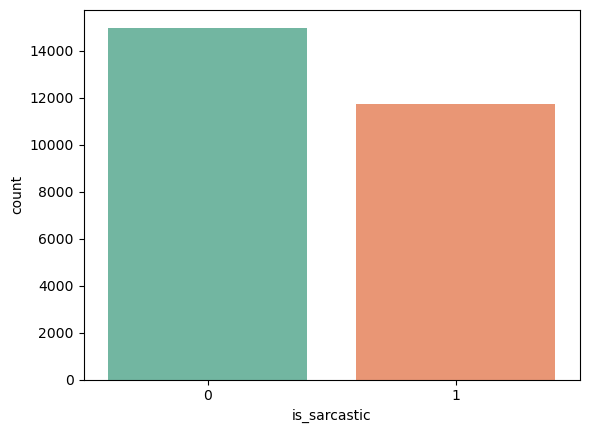

In [442]:
sns.countplot(dataFrame.is_sarcastic , palette='Set2')

In [436]:
dataFrame['headline_split'] = dataFrame.headline.apply(lambda x: len(x.split()))

In [443]:
sarcastic_data_frame= dataFrame[dataFrame["is_sarcastic"] == 1]
serious_sarcastic_data_frame= dataFrame[dataFrame["is_sarcastic"] == 0]

/Users/ferasdahrooge/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ferasdahrooge/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


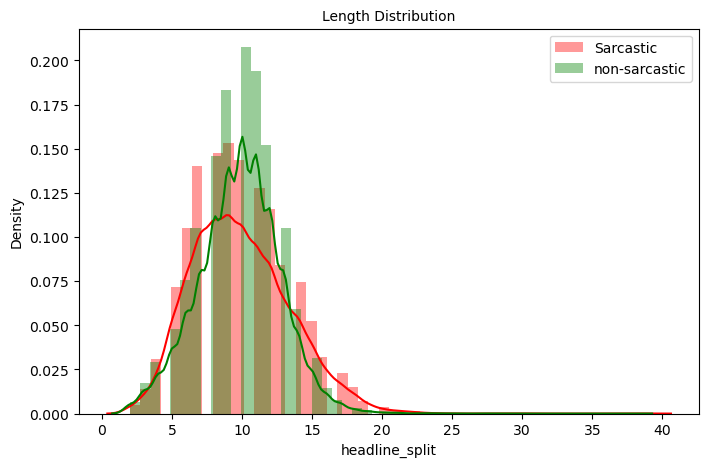

In [444]:
dataFrame["headline_split"] = dataFrame.headline.apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
sns.distplot(sarcastic_data_frame.headline_split, hist= True, label= 'Sarcastic' , color = "red")
sns.distplot(serious_sarcastic_data_frame.headline_split, hist= True, label= 'non-sarcastic' , color = "green")
plt.legend()
plt.title('Length Distribution', fontsize = 10)
plt.show()

#### Cleaning the Data

In [445]:
headline_array = np.array(dataFrame.headline)

In [446]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

In [447]:
stop_words = stopwords.words('english')
punctuation = string.punctuation
lemmatizer = WordNetLemmatizer()

##### Test of Preprocess a specific text

In [448]:
word_test = word_tokenize(headline_array[0])
word_test = [w.lower() for w in word_test]
words = [lemmatizer.lemmatize(word, "v") for word in word_test]
words

['former',
 'versace',
 'store',
 'clerk',
 'sue',
 'over',
 'secret',
 "'black",
 'code',
 "'",
 'for',
 'minority',
 'shoppers']

##### PreProcess Text

- lower case of all texts
- remove newline characters
- lemmetize 

In [449]:
def preprocess_text(df, column, new_column):
  """
  Preprocesses texts from a pandas dataFrame into a new column
  """
  # Tokenize the sentences
  df[new_column] = df[column].apply(lambda x: x.lower())
  df[new_column].apply(lambda x: re.sub("\\n", "" , x))
  df[new_column].apply(lambda x: word_tokenize(x))
  # # Remove stop words
  df[new_column].apply(lambda x: [lemmatizer.lemmatize(word, pos="v") for word in x])
  df[new_column].apply(lambda x: [word for word in x if word not in stop_words])
  df[new_column].apply(lambda x: [word for word in x if word not in punctuation])
  # # Join the sentences back together
  df[new_column].apply(lambda x: " ".join(x))
  return df


In [450]:
def preprocess_sentence(sentence):
  """
  Preprocesses texts of any sentence by cleaning the text
  """
  sentence = sentence.lower()
  # sentence = re.sub("count=\\n", "", sentence)
  sentence = word_tokenize(sentence)
  sentence = [lemmatizer.lemmatize(word , pos="v") for word in sentence]
  sentence = [word for word in sentence if word not in stop_words]
  sentence = [word for word in sentence if word not in punctuation]
  sentence = " ".join(sentence)
  return sentence

In [451]:
preprocess_sentence("I’m not saying I hate you, what I’m saying is that you are literally the Monday of my life")

'’ say hate ’ say literally monday life'

In [452]:
def preprocessed_headline_split(df , column , new_column):
  df[new_column] = df[column].apply(lambda x: len(x.split()))
  return df

In [453]:
data_adjusted = preprocess_text(dataFrame, 'headline', "new_headline")
data_preprocessed = preprocessed_headline_split(data_adjusted, "new_headline", 'new_headline_split')

In [454]:
data_preprocessed

,article_link,headline,is_sarcastic,headline_split,new_headline,new_headline_split
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,12,former versace store clerk sues over secret 'b...,12
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,14,the 'roseanne' revival catches up to our thorn...,14
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,14,mom starting to fear son's web series closest ...,14
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,13,"boehner just wants wife to listen, not come up...",13
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,11,j.k. rowling wishes snape happy birthday in th...,11
...,...,...,...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0,5,american politics in moral free-fall,5
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0,4,america's best 20 hikes,4
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0,3,reparations and obama,3
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0,8,israeli ban targeting boycott supporters raise...,8


#### Get Number of Unique Words in preprocessed texts

- To Determine the total number of unique words throughout the entire dataset

In [455]:
joined_sentences = " ".join(data_preprocessed["new_headline"])
word_list = joined_sentences.split()
unique_words = set(word_list)
total_unique_words = len(unique_words)
total_unique_words

36599

##### Check Average

This is just to check the average number of words after preprocessing our data in the dataset for both serious and sarcastic

In [456]:
data_preprocessed.groupby(['is_sarcastic']).new_headline_split.mean()

is_sarcastic
0    9.815616
1    9.884425
Name: new_headline_split, dtype: float64

##### Get Largest

This is just to check the number of words in our biggest sentence based on what the sentence is labelled as

In [457]:
data_preprocessed.groupby(['is_sarcastic']).new_headline_split.max()

is_sarcastic
0    38
1    39
Name: new_headline_split, dtype: int64

#### Splitting the Data

- Split Data into 3 ways training validation and testing of 75%/12.5%/12.5%

In [458]:
def get_dataset_partitions_pd(df, train_split=0.75, val_split=0.125, test_split=0.125):
  # assert the sum of all the data split = 1
  assert(train_split + val_split + test_split) == 1
  # assert for equal splitting for both validation and testing
  assert(val_split == test_split)

  #Split the Data
  df_sample = df.sample(frac = 1 , random_state = 42)
  
  train_df = df_sample.sample(frac = train_split, random_state = 42)
  val_df = df_sample.sample(frac = val_split, random_state = 42)
  test_df = df_sample.sample(frac = test_split, random_state = 42)
  # return train, val, test dataframes
  return train_df, val_df, test_df

In [459]:
train_ds , val_ds , test_ds  = get_dataset_partitions_pd(data_preprocessed) 

In [460]:
test_ds.iloc[1].headline

"who's that woman dressed like bowie at the oscars? introducing, sandy powell."

In [461]:
val_ds.groupby(["is_sarcastic"]).new_headline_split.count()

is_sarcastic
0    1849
1    1490
Name: new_headline_split, dtype: int64

In [462]:
test_ds.groupby(["is_sarcastic"]).new_headline_split.count()

is_sarcastic
0    1849
1    1490
Name: new_headline_split, dtype: int64

In [463]:
train_ds.groupby(["is_sarcastic"]).new_headline_split.count()

is_sarcastic
0    11225
1     8807
Name: new_headline_split, dtype: int64

#### Convert Text into series of Tokens

- More of hypertuning the text before training our models

In [464]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ReduceLROnPlateau 

In [465]:
max_words = total_unique_words
oov_token = '<00V>'
batch_size = 64

In [466]:
tokenizer = Tokenizer(num_words=max_words , oov_token= oov_token)
tokenizer.fit_on_texts(train_ds.new_headline)
word_index = tokenizer.word_index

##### Hypertune the 3 datasets

In [467]:
def convert_text_to_values_from_column(ds , column , max_length = 100, padding_type = "post" , trunc_type = "post"):
  """
  converts texts into a sequence of numbers
  """
  sequences = tokenizer.texts_to_sequences(ds[column])
  sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
  return sequences

In [485]:
def convert_text_to_values(sentence, max_length = 100, padding_type = "post" , trunc_type = "post"):
  """
  converts texts into a sequence of numbers
  """
  sequences = tokenizer.texts_to_sequences(sentence)
  sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
  return sequences

In [468]:
train_sequences = convert_text_to_values_from_column(train_ds , "new_headline")
val_sequences = convert_text_to_values_from_column(val_ds , "new_headline")
test_sequences = convert_text_to_values_from_column(test_ds , "new_headline")

In [469]:
train_sequences

array([[ 5672,   567,  4836, ...,     0,     0,     0],
       [ 1152,    28,    56, ...,     0,     0,     0],
       [ 5676,  6923,  2278, ...,     0,     0,     0],
       ...,
       [   95,  1979,  4454, ...,     0,     0,     0],
       [25640,     3,  8694, ...,     0,     0,     0],
       [  889,  1056,   993, ...,     0,     0,     0]], dtype=int32)

In [470]:
val_sequences

array([[ 5672,   567,  4836, ...,     0,     0,     0],
       [ 1152,    28,    56, ...,     0,     0,     0],
       [ 5676,  6923,  2278, ...,     0,     0,     0],
       ...,
       [14930, 14931,  2240, ...,     0,     0,     0],
       [ 1880,  7070,  1558, ...,     0,     0,     0],
       [14932, 14933,  1443, ...,     0,     0,     0]], dtype=int32)

In [471]:
test_sequences

array([[ 5672,   567,  4836, ...,     0,     0,     0],
       [ 1152,    28,    56, ...,     0,     0,     0],
       [ 5676,  6923,  2278, ...,     0,     0,     0],
       ...,
       [14930, 14931,  2240, ...,     0,     0,     0],
       [ 1880,  7070,  1558, ...,     0,     0,     0],
       [14932, 14933,  1443, ...,     0,     0,     0]], dtype=int32)

#### Build a series of Models

##### First Experimental Model, Bidirectional Embedding LSTM model

In [472]:
from tensorflow.keras.callbacks import ReduceLROnPlateau 

In [473]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(max_words+ 1, batch_size , input_length=max_length),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 64)           2342400   
                                                                 
 bidirectional_8 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,416,769
Trainable params: 2,416,769
Non-trainable params: 0
_________________________________________________________________


In [474]:
history = model.fit(train_sequences, train_ds.is_sarcastic, batch_size=32, epochs=6, 
                    validation_data=(val_sequences, val_ds.is_sarcastic), 
                    callbacks=[rlrp] ,verbose=1)

Epoch 1/6
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ('self',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ('self',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
626/626 [==============================] - ETA: 0s - loss: 0.3893 - accuracy: 0.8158WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f915662b940> and will run it as-is.
Please report this to the TensorFlow team. When filing th

105/105 [==============================] - 1s 11ms/step - loss: 0.0056 - accuracy: 0.9985
Test Loss:  0.005636684596538544
Test Accuracy 0.9985025525093079
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


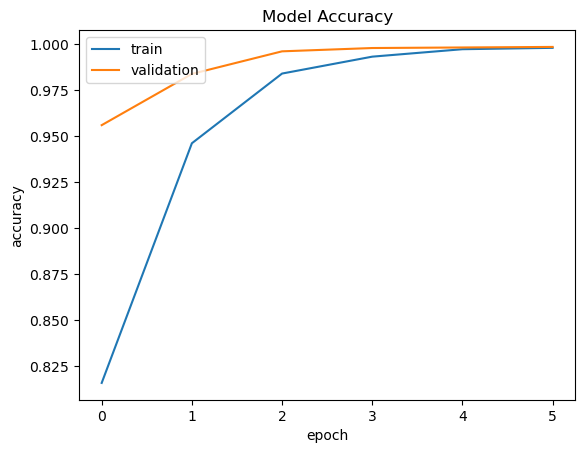

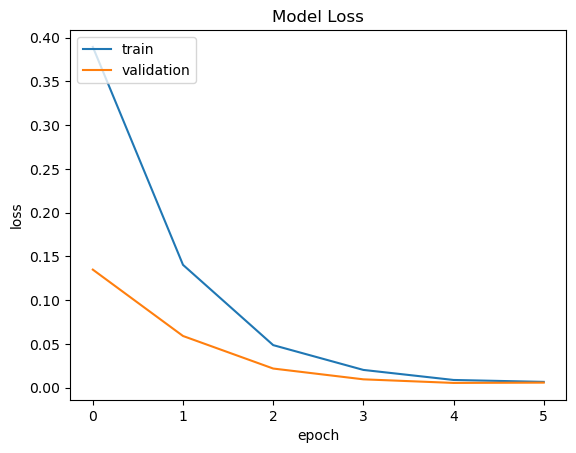

In [475]:
score = model.evaluate(test_sequences, test_ds.is_sarcastic)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Based on the graphs, it seems that the number of epochs would be most suitable when its approximately equal to 6

In [476]:
prediction_model_bidir_large_unit = model.predict(test_sequences)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
105/105 [==============================] - 2s 11ms/step


#### Bidirectional Embedding with LSTM with number of units divided by Half

In [477]:
# Model 2
model_bidir_smaller_units = tf.keras.Sequential([
  tf.keras.layers.Embedding(max_words, batch_size,input_length = max_length),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 32, return_sequences = True)),  
  tf.keras.layers.GlobalMaxPool1D(),
  tf.keras.layers.Dense(16, activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation = 'sigmoid'),
])
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_bidir_smaller_units.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_bidir_smaller_units.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 64)           2342336   
                                                                 
 bidirectional_9 (Bidirectio  (None, 100, 64)          24832     
 nal)                                                            
                                                                 
 global_max_pooling1d_6 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_20 (Dense)            (None, 16)                1040      
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_21 (Dense)            (None, 1)               

In [478]:
history_bidir = model_bidir_smaller_units.fit(train_sequences, train_ds.is_sarcastic, batch_size=32, epochs=6 , 
                    validation_data=(val_sequences, val_ds.is_sarcastic),
                    callbacks=[rlrp] ,verbose=1)

Epoch 1/6
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ('self',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ('self',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
625/626 [============================>.] - ETA: 0s - loss: 0.4207 - accuracy: 0.8007WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f915279ab80> and will run it as-is.
Please report this to the TensorFlow team. When filing th

105/105 [==============================] - 1s 8ms/step - loss: 0.0035 - accuracy: 0.9991
Test Loss:  0.0034959018230438232
Test Accuracy 0.9991015195846558
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


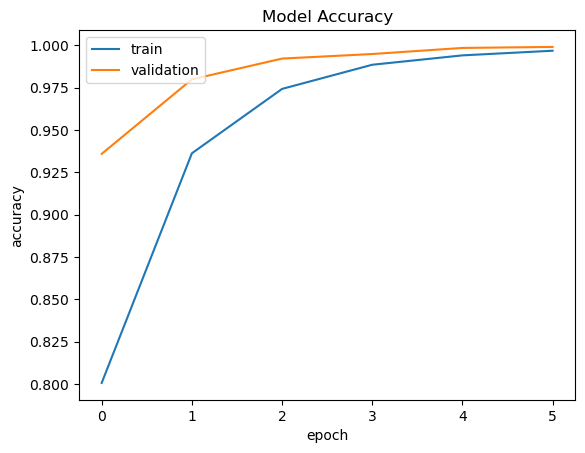

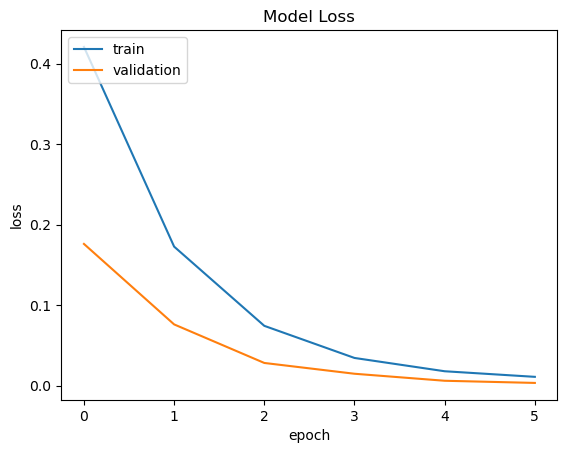

In [479]:
score = model_bidir_smaller_units.evaluate(test_sequences, test_ds.is_sarcastic)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_bidir.history.keys())
# summarize history for accuracy
plt.plot(history_bidir.history['accuracy'])
plt.plot(history_bidir.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_bidir.history['loss'])
plt.plot(history_bidir.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [480]:
prediction_model_bidir_smaller_unit = model_bidir_smaller_units.predict(test_sequences)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
105/105 [==============================] - 1s 7ms/step


#### GRU Model (Gated Recurrent Unit)

In [481]:
# Model-3
model_gru = tf.keras.Sequential([
  tf.keras.layers.Embedding(max_features, 64, input_length=max_length),
  tf.keras.layers.GRU(64 , dropout= 0.25 , recurrent_dropout= 0.25 , return_sequences= True),
  tf.keras.layers.GlobalMaxPool1D(),
  tf.keras.layers.Dense(16, activation = "relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 64)           6400000   
                                                                 
 gru_2 (GRU)                 (None, 100, 64)           24960     
                                                                 
 global_max_pooling1d_7 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_22 (Dense)            (None, 16)                1040      
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                     

In [482]:
history_gru = model_gru.fit(train_sequences, train_ds.is_sarcastic, batch_size=64, epochs=6, 
                    validation_data=(val_sequences , val_ds.is_sarcastic), 
                    callbacks=[rlrp] ,verbose=1)

Epoch 1/6
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ('self',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ('self',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - ETA: 0s - loss: 0.4743 - accuracy: 0.7592WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f917813d4c0> and will run it as-is.
Please report this to the TensorFlow team. When filing th

105/105 [==============================] - 1s 8ms/step - loss: 0.0117 - accuracy: 0.9976
Test Loss:  0.011683973483741283
Test Accuracy 0.9976040720939636
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


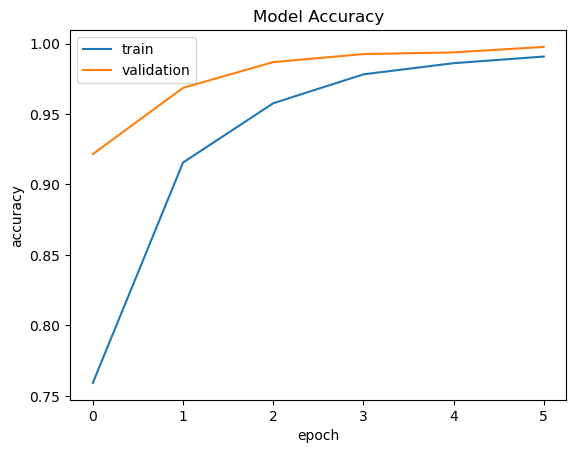

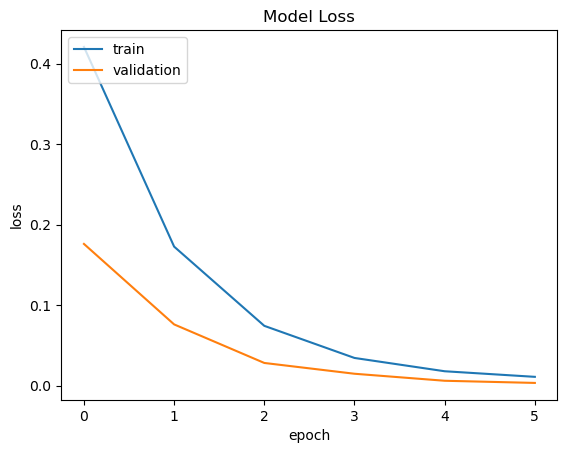

In [483]:
score = model_gru.evaluate(test_sequences, test_ds.is_sarcastic)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_gru.history.keys())
# summarize history for accuracy
plt.plot(history_gru.history['accuracy'])
plt.plot(history_gru.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_bidir.history['loss'])
plt.plot(history_bidir.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [484]:
prediction_model_gru = model_gru.predict(test_sequences)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
105/105 [==============================] - 1s 9ms/step


In [498]:
sentence = "Your Mom reminds me to shower everynight cause she smells like death"
sentence = preprocess_sentence(sentence)
print(sentence)
sentence_sequence = convert_text_to_values(sentence)
print(sentence_sequence)
prediction = model_bidir_smaller_units.predict([sentence_sequence])
prediction


mom remind shower everynight cause smell like death
[[1137    0    0 ...    0    0    0]
 [3747    0    0 ...    0    0    0]
 [1137    0    0 ...    0    0    0]
 ...
 [   7    0    0 ...    0    0    0]
 [ 639    0    0 ...    0    0    0]
 [3073    0    0 ...    0    0    0]]
2/2 [==============================] - 0s 8ms/step


array([[0.9981565 ],
       [0.36878255],
       [0.9981565 ],
       [0.83624154],
       [0.97783875],
       [0.96702594],
       [0.9981565 ],
       [0.02515688],
       [0.53391254],
       [0.69219047],
       [0.83624154],
       [0.7455611 ],
       [0.02235432],
       [0.36878255],
       [0.03069908],
       [0.96702594],
       [0.97783875],
       [0.83624154],
       [0.96702594],
       [0.06913187],
       [0.96702594],
       [0.97783875],
       [0.5684957 ],
       [0.53391254],
       [0.02515688],
       [0.73861337],
       [0.02235432],
       [0.8076835 ],
       [0.83624154],
       [0.44972   ],
       [0.03904498],
       [0.77771544],
       [0.7455611 ],
       [0.96702594],
       [0.83624154],
       [0.7455611 ],
       [0.9981565 ],
       [0.96702594],
       [0.9421181 ],
       [0.9421181 ],
       [0.83624154],
       [0.9421181 ],
       [0.02515688],
       [0.31366053],
       [0.96702594],
       [0.83624154],
       [0.69219047],
       [0.967

In [499]:
prediction = np.squeeze(prediction)
average_prediction = np.mean(prediction)
threshold = 0.5
if average_prediction > 0.5:
    print("Sentence is sarcastic")
else:
    print("Sentence is BOO")

Sentence is sarcastic


### Based on the 3 models built so far, the Most optimum was the Bidirectional LSTM model with smaller number of units which is approximately equal to 32 units